SUPERDENSE CODING (SELF/REVISE)(19/06/2025)

In [8]:
from qiskit import QuantumCircuit,QuantumRegister,ClassicalRegister
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

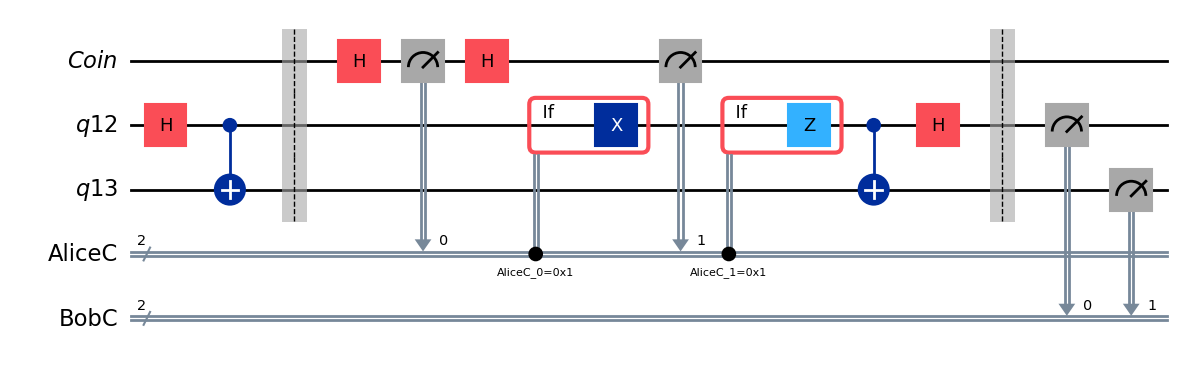

In [9]:
coin=QuantumRegister(1,"Coin")
ebit0=QuantumRegister(1)
ebit1=QuantumRegister(1)
Bc=ClassicalRegister(2,"BobC")
Ac=ClassicalRegister(2,"AliceC")

crqt=QuantumCircuit(coin,ebit0,ebit1,Ac,Bc)

#Initializing Entagled Bit
crqt.h(ebit0)
crqt.cx(ebit0,ebit1)
crqt.barrier()

#Random Bits generation using Coin qubit
crqt.h(coin)
crqt.measure(coin,Ac[0])
crqt.h(coin)
crqt.measure(coin,Ac[1])

#Applying approiate operations
with crqt.if_test((Ac[0],1)):
    crqt.x(ebit0)
with crqt.if_test((Ac[1],1)):
    crqt.z(ebit0)

crqt.cx(ebit0,ebit1)
crqt.h(ebit0)
crqt.barrier()

#Measuring the Bits BOB
crqt.measure(ebit0,Bc[0])
crqt.measure(ebit1,Bc[1])


display(crqt.draw("mpl"))


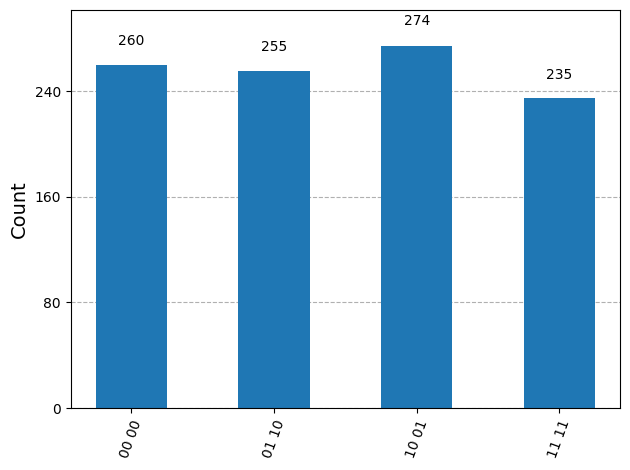

In [11]:
result=AerSimulator().run(crqt).result()
stats=result.get_counts()
plot_histogram(stats)